In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold  
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
import random

In [6]:
wine_df = pd.read_csv('DataSetGrupa3\wine.csv')
tel_df = pd.read_csv('DataSetGrupa3\Telecust1.csv')

In [25]:
tel_df.custcat.replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4], inplace=True)

In [26]:
tel_df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,1
1,3,11,33,136,1,7,5,5,0,0,6,4
2,3,68,52,116,1,24,1,29,0,1,2,3
3,2,33,33,33,0,12,2,0,0,1,1,1
4,2,23,30,30,1,9,1,2,0,0,4,3


In [ ]:
## Show information about data

In [30]:
tel_df.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [43]:
## Display mean, mediana and variance of data

In [41]:
print('Mean\n', tel_df.mean(),'\n\n\n', 'Mediana\n', tel_df.median(), '\n\n\n', 'Variance\n', tel_df.var())

Mean
 region      2.022
tenure     35.526
age        41.684
income     77.535
marital     0.495
address    11.551
ed          2.671
employ     10.987
retire      0.047
gender      0.517
reside      2.331
custcat     2.487
dtype: float64 


 Mediana
 region      2.0
tenure     34.0
age        40.0
income     47.0
marital     0.0
address     9.0
ed          3.0
employ      8.0
retire      0.0
gender      1.0
reside      2.0
custcat     3.0
dtype: float64 


 Variance
 region         0.666182
tenure       456.241566
age          157.723868
income     11458.453228
marital        0.250225
address      101.741140
ed             1.494253
employ       101.648479
retire         0.044836
gender         0.249961
reside         2.061501
custcat        1.255086
dtype: float64


In [45]:
## Plotting 

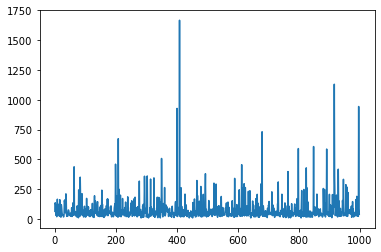

In [58]:
plt.plot(tel_df.index, tel_df.income)

(array([333., 223., 137.,  83.,  95.,  54.,  29.,  29.,   9.,   8.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <BarContainer object of 10 artists>)

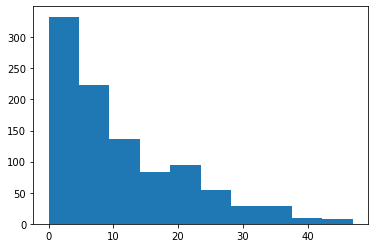

In [60]:
plt.hist(tel_df.employ)

In [92]:
# Build logistic regresion for tel 

In [96]:
model = LogisticRegression()
tel_X = tel_df[['region', 'income']].values
tel_y = tel_df['custcat'].values
model.fit(tel_X, tel_y)
print(model.coef_, model.intercept_)

[[ 0.11328085 -0.004551  ]
 [-0.08069622  0.0006233 ]
 [-0.04251669  0.00188302]
 [ 0.00993206  0.00204468]] [ 0.13385419 -0.0010055   0.08140939 -0.21425809]


In [ ]:
# Prognosis on first ten elemenets and random data

In [113]:
print(model.predict(tel_X[:10]))
rd = [rand]
rand = []
for i in range(20):
    rand.append([random.randint(0,4), random.randint(0,1000)])
print(model.predict(rand))

[3 3 3 1 1 3 1 3 3 3]
[3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3]


In [114]:
# Making prediction for all data

In [115]:
y_pred = model.predict(X)

In [117]:
print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))
print("confusion matrix: ", confusion_matrix(y, y_pred))

accuracy: 0.5347091932457786
precision: 0.5347091932457786
recall: 1.0
f1 score: 0.6968215158924205
confusion matrix:  [[  0 744]
 [  0 855]]


In [ ]:
# confusion matrix:  [[  0 744] [  0 855]]
# 744 - liczna elementów faktycznych, przypisanych w danych
# 855 liczba elementów przypisanych przez model 
# 855 / (744 + 855) = 0.5347091932457786

In [119]:
# Train test

In [120]:
X = tel_df[['region', 'income', 'age']].values
y = tel_df['custcat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [121]:
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (1000, 3) (1000,)
training set: (750, 3) (750,)
test set: (250, 3) (250,)


In [ ]:
# Test with KFold

In [153]:
kf = KFold(n_splits=5, shuffle=True)

scores = []
kf = KFold(n_splits=5, shuffle=True)
# loop x time on the data splited by 80/20 with different segmentation 
for train_index, test_index in kf.split(X):
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print(np.mean(scores))
final_model = LogisticRegression()
final_model.fit(X, y)

[0.34, 0.34, 0.34, 0.34, 0.34]
0.34


LogisticRegression()

In [154]:
# Function for testing on different data

In [161]:
def score_model(X, y, split):
    scores = []
    kf = KFold(n_splits=split, shuffle=True)
    # loop x time on the data splited by 80/20 with different segmentation 
    for train_index, test_index in kf.split(X):
        X_train = X[train_indices]
        X_test = X[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        model = LogisticRegression(solver='lbfgs', max_iter=1000)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print(scores)
    print(np.mean(scores))
    final_model = LogisticRegression()
    final_model.fit(X, y)
    print(final_model.score(X_test, y_test))

In [162]:
# Test kf on different data
X = tel_df[['region', 'address']].values
y = tel_df['custcat'].values
score_model(X, y ,10)

[0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32]
0.31999999999999995
0.335


In [163]:
# ROC - narzędzie dzięki któremu,
# można odkryć różnice między współczynnikami prawdziwych pozytywów (TPR) 
# i współczynnikami fałszywych pozytywów (FPR). 
# Dzięki temu można dobrać model oraz futures w taki sposób by model był jak najbardziej dokładny,
# pomocnym w tym jest również plot dokonywany przez ROC. Czym bardziej linia jest zakrzywiona do lewego 
# górnego rogu na wykresie tym lepiej

2


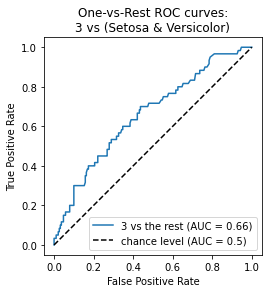

In [345]:
# standard training model 
X = tel_df[['region', 'income']].values


rand = []
for i in range(1000):
    rand.append([ random.randint(999,1000)])


# X_train, X_test, y_train, y_test = train_test_split(np.array(rand), y)

y = tel_df['custcat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_score = model.fit(X_train, y_train).predict_proba(X_test)


# convert multi data to binary 
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

# which category of clients we are intrested in 
class_of_interest = 3

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
# plotting 
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_of_interest],
    y_score[:, class_of_interest],
    name=f"{class_of_interest} vs the rest"
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n"+ str(class_of_interest) +" vs (Setosa & Versicolor)")
plt.legend()
plt.show()